# Netflix - (Business Case-Study)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1Rbs1er7UZU5KPCk9ZAPvd0WTEJR6Jqk_

Downloading...
From: https://drive.google.com/uc?id=1Rbs1er7UZU5KPCk9ZAPvd0WTEJR6Jqk_
To: /content/Netflix_DataSet.csv
100% 3.40M/3.40M [00:00<00:00, 172MB/s]


In [ ]:
df = pd.read_csv('/content/Netflix_DataSet.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
df.shape

(8807, 12)

### Brief Info about columns present in the given dataset.

● Show ID : The ID of the show

● Type: Identifier - A Movie or TV Show

● Title: Title of the Movie / Tv Show

● Director: Director of the Movie

● Cast: Actors involved in the movie/show

● Country: Country where the movie/show was produced

● Date_added: Date it was added on Netflix

● Release_year: Actual Release year of the movie/show

● Rating: TV Rating of the movie/show

● Duration: Total Duration - in minutes or number of seasons

● Listed_in: Genre

● Description: The summary description

## Step 1: Un-nesting the columns (having multile comma separated values in multiple rows.)

In [ ]:
Cast = df['cast'].str.split(', ').explode()
Cast

0                         NaN
1                  Ama Qamata
1                 Khosi Ngema
1               Gail Mabalane
1              Thabang Molaba
                ...          
8806         Manish Chaudhary
8806             Meghna Malik
8806            Malkeet Rauni
8806           Anita Shabdish
8806    Chittaranjan Tripathy
Name: cast, Length: 64951, dtype: object

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df['cast'] = df['cast'].str.split(', ')
df = df.explode('cast')

df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in')

df = df.reset_index(drop = True)

In [ ]:
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

df = df.reset_index(drop = True)

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
149507,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
149508,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
149509,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
149510,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
# director, cast, country, date_added, rating, duration has null values

In [ ]:
df['director'].fillna('unknown director', inplace = True)

In [ ]:
df['cast'].fillna('unknown cast', inplace = True)

In [ ]:
df['country'].fillna('unknown country', inplace = True)

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
149507,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
149508,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
149509,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
149510,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149512 entries, 0 to 149511
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       149512 non-null  object
 1   type          149512 non-null  object
 2   title         149512 non-null  object
 3   director      149512 non-null  object
 4   cast          149512 non-null  object
 5   country       149512 non-null  object
 6   date_added    149354 non-null  object
 7   release_year  149512 non-null  int64 
 8   rating        149445 non-null  object
 9   duration      149509 non-null  object
 10  listed_in     149512 non-null  object
 11  description   149512 non-null  object
dtypes: int64(1), object(11)
memory usage: 13.7+ MB


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date'],
      dtype='object')

In [ ]:
df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
2,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24
3,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24
4,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...
149507,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019-03-02
149508,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2019-03-02
149509,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019-03-02
149510,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019-03-02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149512 entries, 0 to 149511
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       149512 non-null  object        
 1   type          149512 non-null  object        
 2   title         149512 non-null  object        
 3   director      149512 non-null  object        
 4   cast          149512 non-null  object        
 5   country       149512 non-null  object        
 6   release_year  149512 non-null  int64         
 7   rating        149445 non-null  object        
 8   duration      149509 non-null  object        
 9   listed_in     149512 non-null  object        
 10  description   149512 non-null  object        
 11  date          149354 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 13.7+ MB


In [ ]:
df['duration'].fillna('unknown duration',inplace=True)

In [ ]:
df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
2,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24
3,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24
4,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...
149507,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019-03-02
149508,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2019-03-02
149509,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019-03-02
149510,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019-03-02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149512 entries, 0 to 149511
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       149512 non-null  object        
 1   type          149512 non-null  object        
 2   title         149512 non-null  object        
 3   director      149512 non-null  object        
 4   cast          149512 non-null  object        
 5   country       149512 non-null  object        
 6   release_year  149512 non-null  int64         
 7   rating        149445 non-null  object        
 8   duration      149512 non-null  object        
 9   listed_in     149512 non-null  object        
 10  description   149512 non-null  object        
 11  date          149354 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 13.7+ MB


In [ ]:
df['date'].fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149512 entries, 0 to 149511
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       149512 non-null  object
 1   type          149512 non-null  object
 2   title         149512 non-null  object
 3   director      149512 non-null  object
 4   cast          149512 non-null  object
 5   country       149512 non-null  object
 6   release_year  149512 non-null  int64 
 7   rating        149445 non-null  object
 8   duration      149512 non-null  object
 9   listed_in     149512 non-null  object
 10  description   149512 non-null  object
 11  date          149512 non-null  object
dtypes: int64(1), object(11)
memory usage: 13.7+ MB


In [ ]:
df['rating'].fillna('unknown rating', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149512 entries, 0 to 149511
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       149512 non-null  object
 1   type          149512 non-null  object
 2   title         149512 non-null  object
 3   director      149512 non-null  object
 4   cast          149512 non-null  object
 5   country       149512 non-null  object
 6   release_year  149512 non-null  int64 
 7   rating        149512 non-null  object
 8   duration      149512 non-null  object
 9   listed_in     149512 non-null  object
 10  description   149512 non-null  object
 11  date          149512 non-null  object
dtypes: int64(1), object(11)
memory usage: 13.7+ MB


In [ ]:
# Now the data is unnested and null values are removed. Lets do some analysis.

In [ ]:
df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25 00:00:00
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24 00:00:00
2,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24 00:00:00
3,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24 00:00:00
4,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
149507,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019-03-02 00:00:00
149508,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2019-03-02 00:00:00
149509,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019-03-02 00:00:00
149510,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019-03-02 00:00:00


In [ ]:
df.groupby(['director'])['title'].value_counts()

director             title                
A. L. Vijay          Abhinetri                24
                     Watchman                 18
A. Raajdheep         Asura Guru               10
A. Salaam            Salaakhen                30
A.R. Murugadoss      Sarkar                   18
                                              ..
Óskar Thór Axelsson  Ég man þig               20
Ömer Faruk Sorak     G.O.R.A                  30
                     Aşk Tesadüfleri Sever    24
Şenol Sönmez         Hayat Öpücügü            24
                     Kill Me If You Dare      24
Name: title, Length: 8807, dtype: int64

In [ ]:
df.groupby(['country'])['director'].value_counts()

country            director                           
, France, Algeria  Najwa Najjar                            24
, South Korea      unknown director                         8
Argentina          unknown director                       414
                   Alejandro Doria                         60
                   Gabriel Grieco                          36
                                                         ... 
unknown country    Tiller Russell                           1
                   Todd Biermann                            1
                   Tyler Greco                              1
                   Xavier Maingon, Marc-Antoine Hélard      1
                   Yoo Byung-jae                            1
Name: director, Length: 5180, dtype: int64

In [ ]:
df.groupby(['director'])['listed_in'].value_counts()

director          listed_in           
A. L. Vijay       Comedies                14
                  International Movies    14
                  Sci-Fi & Fantasy         8
                  Dramas                   6
A. Raajdheep      Dramas                   5
                                          ..
Ömer Faruk Sorak  Romantic Movies          8
Şenol Sönmez      Comedies                16
                  International Movies    16
                  Dramas                   8
                  Romantic Movies          8
Name: listed_in, Length: 10975, dtype: int64

In [ ]:
df.groupby(['release_year'])['title'].value_counts()

release_year  title                                        
1925          Pioneers: First Women Filmmakers*                1
1942          The Battle of Midway                             4
              Prelude to War                                   2
1943          Undercover: How to Operate Behind Enemy Lines    2
              WWII: Report from the Aleutians                  1
                                                              ..
2021          The World's Most Amazing Vacation Rentals        1
              Top Secret UFO Projects: Declassified            1
              Turning Point: 9/11 and the War on Terror        1
              We Are: The Brooklyn Saints                      1
              Why Did You Kill Me?                             1
Name: title, Length: 8807, dtype: int64

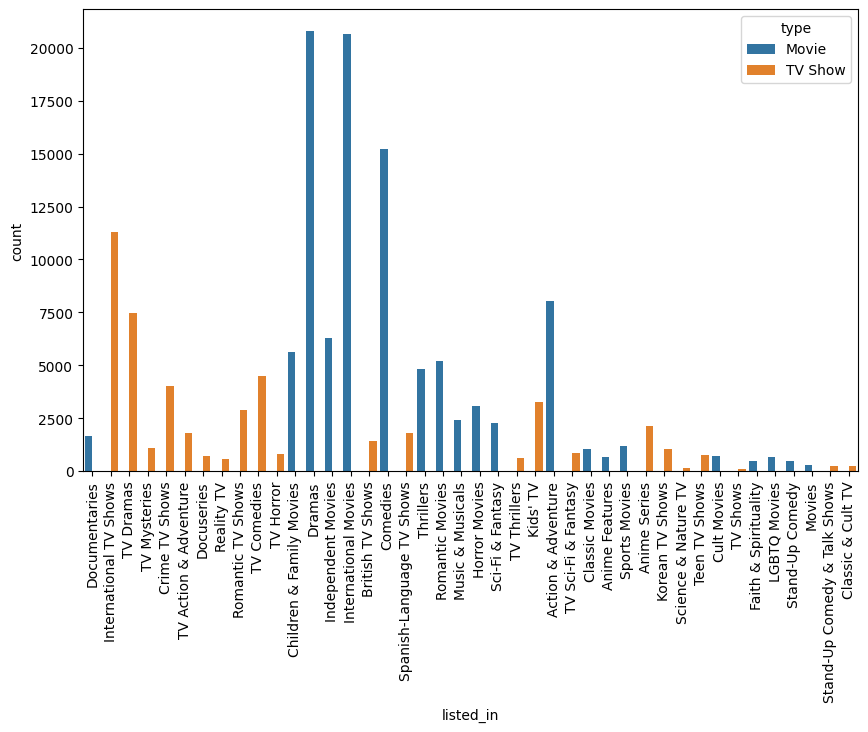

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='listed_in',hue='type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Recommendation: We can say that in terms of genre (dramas and international movies), under movies category are made more.

In [ ]:
df.groupby(['country','type'])['title'].count()

country                                              type   
, France, Algeria                                    Movie        24
, South Korea                                        TV Show       8
Argentina                                            Movie       569
                                                     TV Show     426
Argentina, Brazil, France, Poland, Germany, Denmark  Movie        15
                                                                ... 
Vietnam                                              Movie       118
West Germany                                         Movie         2
Zimbabwe                                             Movie        36
unknown country                                      Movie      5708
                                                     TV Show    5437
Name: title, Length: 849, dtype: int64

In [ ]:
grouped_counts = df.groupby(['country', 'type'])['title'].count()
reshaped_counts = grouped_counts.unstack()
sorted_countries = grouped_counts.sort_values(ascending=False)
top_10_countries = sorted_countries.head(10)
top_10_countries



country          type   
United States    Movie      28635
India            Movie      18817
United States    TV Show     9916
unknown country  Movie       5708
                 TV Show     5437
Japan            TV Show     4529
South Korea      TV Show     3459
United Kingdom   TV Show     3167
Japan            Movie       2055
Nigeria          Movie       2014
Name: title, dtype: int64

In [ ]:
# Group the dataframe by "country" and "type", and count the occurrences
grouped_counts = df.groupby(['country', 'type'])['title'].count()


reshaped_counts = grouped_counts.unstack()

# Print the result
print(reshaped_counts)


type                                                 Movie  TV Show
country                                                            
, France, Algeria                                     24.0      NaN
, South Korea                                          NaN      8.0
Argentina                                            569.0    426.0
Argentina, Brazil, France, Poland, Germany, Den...    15.0      NaN
Argentina, Chile                                      37.0      NaN
...                                                    ...      ...
Venezuela, Colombia                                    2.0      NaN
Vietnam                                              118.0      NaN
West Germany                                           2.0      NaN
Zimbabwe                                              36.0      NaN
unknown country                                     5708.0   5437.0

[749 rows x 2 columns]


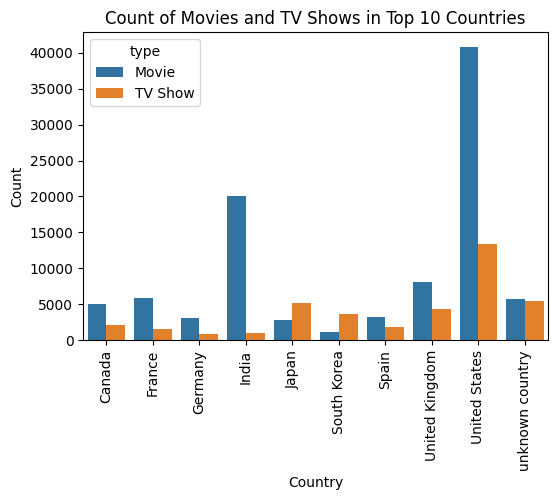

In [ ]:
# Group the dataframe by "country" and "type", and count the occurrences
grouped_counts = df.groupby(['country', 'type'])['title'].count().reset_index()

# Get the top 10 countries based on total count of movies and TV shows
top_10_countries = grouped_counts.groupby('country')['title'].sum().nlargest(10).index

# Filter the grouped counts to include only the top 10 countries
filtered_counts = grouped_counts[grouped_counts['country'].isin(top_10_countries)]

# Plot the count of movies and TV shows for the top 10 countries
plt.figure(figsize=(6, 4))
sns.barplot(x='country', y='title', hue='type', data=filtered_counts)
plt.title('Count of Movies and TV Shows in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# We can say that US has made more movies and tv shows compared to other top 9 countries.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186325 entries, 0 to 186324
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       186325 non-null  object
 1   type          186325 non-null  object
 2   title         186325 non-null  object
 3   director      186325 non-null  object
 4   cast          186325 non-null  object
 5   country       186325 non-null  object
 6   release_year  186325 non-null  int64 
 7   rating        186325 non-null  object
 8   duration      186325 non-null  object
 9   listed_in     186325 non-null  object
 10  description   186325 non-null  object
 11  date          186325 non-null  object
dtypes: int64(1), object(11)
memory usage: 17.1+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186325 entries, 0 to 186324
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       186325 non-null  object        
 1   type          186325 non-null  object        
 2   title         186325 non-null  object        
 3   director      186325 non-null  object        
 4   cast          186325 non-null  object        
 5   country       186325 non-null  object        
 6   release_year  186325 non-null  int64         
 7   rating        186325 non-null  object        
 8   duration      186325 non-null  object        
 9   listed_in     186325 non-null  object        
 10  description   186325 non-null  object        
 11  date          186167 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 17.1+ MB


In [ ]:
df['week'] = df['date'].dt.week

# Separate TV shows and movies
tvshow_df = df[df['type'] == 'TV Show']
movie_df = df[df['type'] == 'Movie']

# Group by the week column and count the total number of TV shows and movies in each week
tvshow_counts = tvshow_df.groupby('week').size()
movie_counts = movie_df.groupby('week').size()

# Analyze the count of TV shows and movies to identify the best week for each category
best_week_tvshow = tvshow_counts.idxmax()
best_week_movie = movie_counts.idxmax()

print(f"The best week to release TV shows is week {best_week_tvshow}")
print(f"The best week to release movies is week {best_week_movie}")

<ipython-input-106-2b57008c5d14>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


The best week to release TV shows is week 27.0
The best week to release movies is week 1.0


<ipython-input-158-dfdac164aa64>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


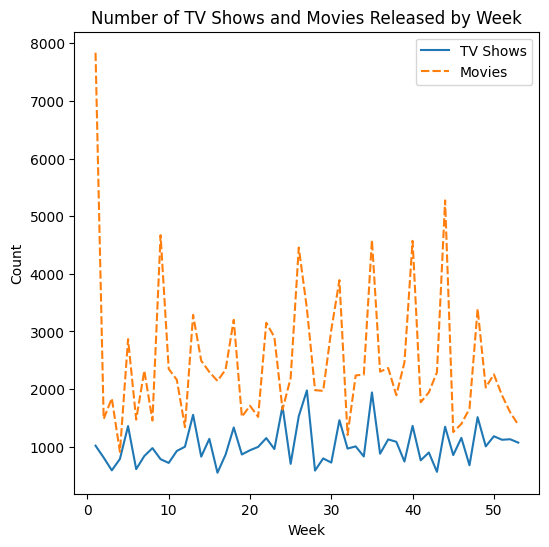

In [158]:
# Create a new column to extract the week number from the date
df['week'] = df['date'].dt.week

# Separate TV shows and movies
tvshow_df = df[df['type'] == 'TV Show']
movie_df = df[df['type'] == 'Movie']

# Group by the week column and count the total number of TV shows and movies in each week
tvshow_counts = tvshow_df.groupby('week').size()
movie_counts = movie_df.groupby('week').size()

# Convert the counts to a dataframe
counts_df = pd.DataFrame({'TV Shows': tvshow_counts, 'Movies': movie_counts})

# Sort the dataframe by week number
counts_df = counts_df.sort_index()

# Plot the results using Seaborn line plot
plt.figure(figsize=(6,6))
sns.lineplot(data=counts_df)

# Set the labels and title of the plot
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Number of TV Shows and Movies Released by Week')

# Display the plot
plt.show()


In [ ]:
# From above graph we can say that the best week to realease movie is week 1st
# From above graph we can say that the best week to realease TV Show is week 27th

In [ ]:
df['month'] = df['date'].dt.month

# Separate TV shows and movies
tvshow_df = df[df['type'] == 'TV Show']
movie_df = df[df['type'] == 'Movie']

# Group by the week column and count the total number of TV shows and movies in each week
tvshow_counts = tvshow_df.groupby('month').size()
movie_counts = movie_df.groupby('month').size()

# Analyze the count of TV shows and movies to identify the best week for each category
best_month_tvshow = tvshow_counts.idxmax()
best_month_movie = movie_counts.idxmax()

print(f"The best week to release TV shows is week {best_month_tvshow}")
print(f"The best week to release movies is week {best_month_movie}")

The best week to release TV shows is week 12.0
The best week to release movies is week 7.0


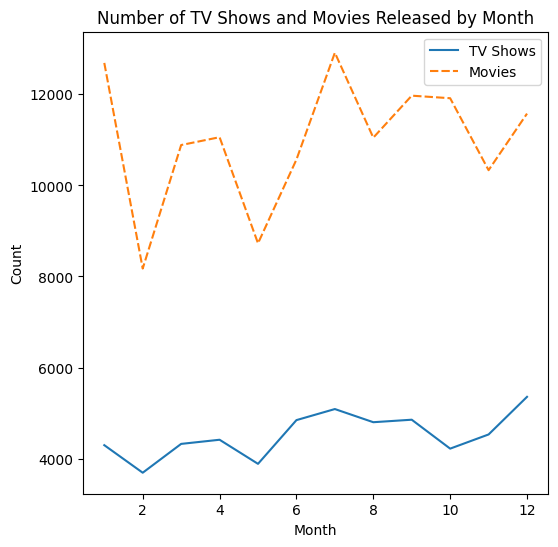

In [157]:
# Create a new column to extract the week number from the date
df['month'] = df['date'].dt.month

# Separate TV shows and movies
tvshow_df = df[df['type'] == 'TV Show']
movie_df = df[df['type'] == 'Movie']

# Group by the week column and count the total number of TV shows and movies in each week
tvshow_counts = tvshow_df.groupby('month').size()
movie_counts = movie_df.groupby('month').size()

# Convert the counts to a dataframe
counts_df = pd.DataFrame({'TV Shows': tvshow_counts, 'Movies': movie_counts})

# Sort the dataframe by week number
counts_df = counts_df.sort_index()

# Plot the results using Seaborn line plot
plt.figure(figsize=(6,6))
sns.lineplot(data=counts_df)

# Set the labels and title of the plot
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of TV Shows and Movies Released by Month')

# Display the plot
plt.show()

In [ ]:
# # From above graph we can say that the best week to realease movie is Month 7st
# From above graph we can say that the best week to realease TV Show is Month 12th

In [ ]:
# Group by each actor and count the number of unique titles
actor_counts = df.groupby('cast')['title'].nunique()

# Sort the actor counts in descending order
sorted_actors = actor_counts.sort_values(ascending=False)

# Get the top 10 actors
top_10_actors = sorted_actors.head(10)

# Print the top 10 actors
print(top_10_actors)


cast
unknown cast        825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Name: title, dtype: int64


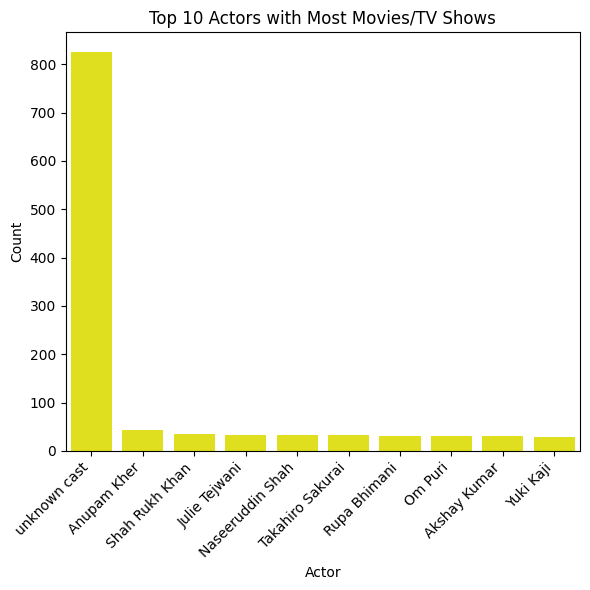

In [156]:
plt.figure(figsize=(6,6))
sns.barplot(x=top_10_actors.index, y=top_10_actors.values, color='yellow')

# Set the labels and title of the plot
plt.xlabel('Actor')
plt.ylabel('Count')
plt.title('Top 10 Actors with Most Movies/TV Shows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Group by each actor and count the number of unique titles
director_counts = df.groupby('director')['title'].nunique()

# Sort the actor counts in descending order
sorted_directors = director_counts.sort_values(ascending=False)

# Get the top 10 actors
top_10_director = sorted_directors.head(10)

# Print the top 10 actors
print(top_10_director)


director
unknown director          2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: title, dtype: int64


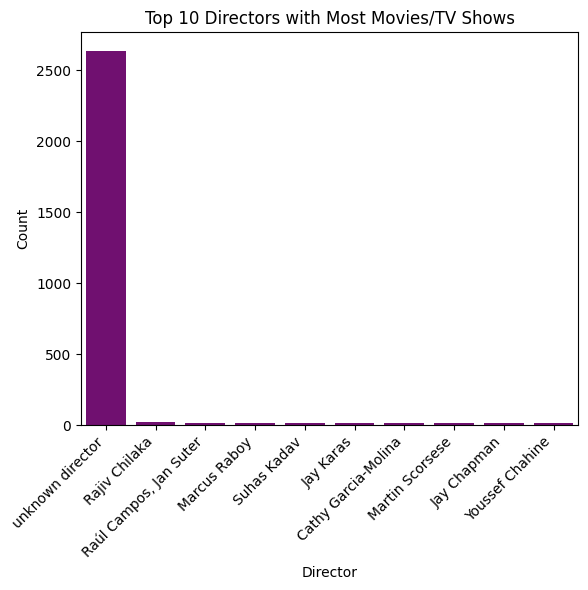

In [159]:
plt.figure(figsize=(6,6))
sns.barplot(x=top_10_director.index, y=top_10_director.values, color='purple')

# Set the labels and title of the plot
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 10 Directors with Most Movies/TV Shows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


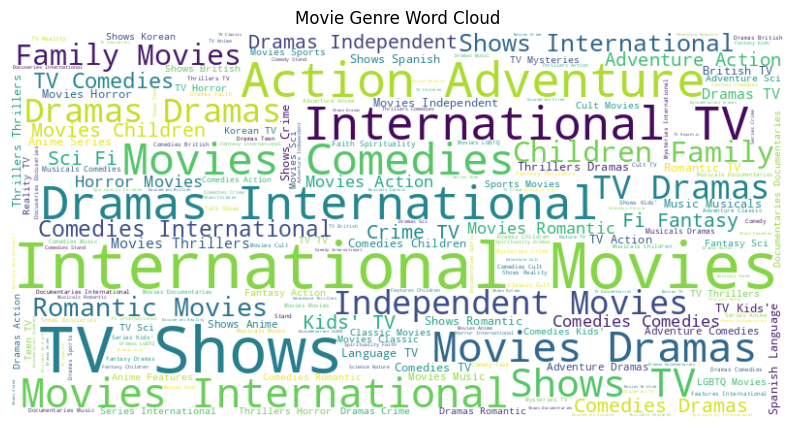

In [ ]:

from wordcloud import WordCloud

# Concatenate all genre values into a single string
genres_text = ' '.join(df['listed_in'].dropna())

# Create a WordCloud object with appropriate configurations
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Genre Word Cloud')

# Display the plot
plt.show()


In [ ]:
# We can say that TV Shows and International Movies under listed in category are produced more.

In [ ]:
# Convert "release_year" column to datetime data type, considering only the year
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y').dt.year

# Calculate the difference in days between "date_added" and "release_year"
df['days_to_netflix'] = (df['date'] - pd.to_datetime(df['release_year'], format='%Y')).dt.days

# Find the mode of the "days_to_netflix" column
mode_days_to_netflix = df['days_to_netflix'].mode().values[0]

# Print the mode of days to Netflix
print(f"The most common number of days to add a movie to Netflix after release is: {mode_days_to_netflix} days")


The most common number of days to add a movie to Netflix after release is: 243.0 days


In [ ]:
# Therefore we can say that 243 days are generally taken to upload any movie on netflix after its release.